In [1]:
%config IPCompleter.greedy=True

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)
print(np.__version__)

2.2.0
1.18.5


In [4]:
(x_train,_),(_,_)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# we just need the images and not the labels as we are not doing any classification
# we are just denoising the images that are already present
print(x_train.shape)

(60000, 28, 28)


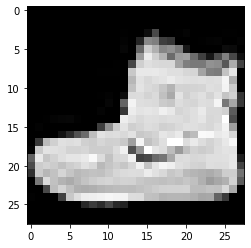

In [6]:
plt.imshow(x_train[0],cmap="gray")

In [7]:
# adding some noise in the data
x_noise_data=x_train+5*np.random.normal(0,1,size=x_train.shape)

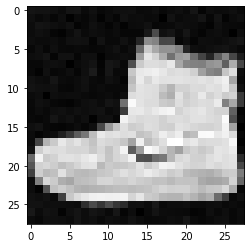

In [8]:
# plotting the noised data
plt.imshow(x_noise_data[0],cmap="gray")

In [9]:
input_shape=x_train.shape[1]*x_train.shape[2]


## well the image is noised and we are going to de-noise the image using neural networks

In [141]:
encoder_model=tf.keras.Sequential(
[
    Dense(784,input_shape=(input_shape,),activation='relu'),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Dense(32,activation="relu"),
    Dense(12,activation="relu"),
    Dense(12,activation="relu")
])

In [142]:
print(encoder_model.output_shape)

(None, 12)


In [143]:
print(encoder_model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_35 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_37 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_38 (Dense)             (None, 12)                396       
_________________________________________________________________
dense_39 (Dense)             (None, 12)               

# Decoder Model
> making the decoder model

In [144]:
decoder_model=tf.keras.Sequential([
    Dense(32,activation="relu",input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    Dense(128,activation="relu"),

    Dense(256,activation="relu"),
    Dense(input_shape,activation="relu")
])

# Setting up losses and optimizers
## for the auto encoders

In [172]:
data=encoder_model.predict(x_noise_data[1000].reshape(1,784))

In [146]:
print(data.shape)
data=decoder_model.predict(data)

(1, 12)


In [147]:
data.shape

(1, 784)

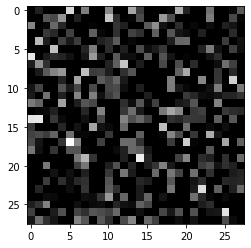

In [148]:
plt.imshow(data.reshape(28,28),cmap='gray')

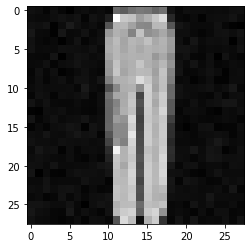

In [173]:
plt.imshow(x_noise_data[1000],cmap="gray")

In [150]:
# we have clubbed our encoder and decoder model together for training here
another_model=tf.keras.Sequential(
    [
     encoder_model,
     decoder_model
    ]
)

In [152]:
# defining the loss > mean squared error
# defining the optimizer > adam 
another_model.compile(loss="mse",optimizer="adam",metrics=["accuracy"],)

In [ ]:
another_model.summary()

In [ ]:
# fitting the model to noise
another_model.fit(x_noise_data.reshape(-1,784)/255,x_train.reshape(-1,784)/255,epochs=50,batch_size=64)

In [174]:
# seeing if the model can denoise the data or not
data=another_model(x_noise_data[1000].reshape(1,784)/255)

In [166]:
data=data.numpy()

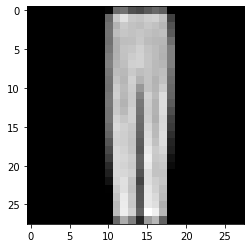

In [167]:
plt.imshow(data.reshape(28,28),cmap='gray')

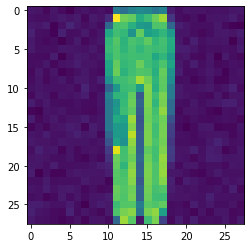

In [200]:
# the noised image that was given as the input
plt.imshow(x_noise_data[1000].reshape(28,28))

In [180]:
# lets see the output of the encoder and decoder model seperately
intermediate_representation=encoder_model(x_noise_data[1000].reshape(1,784)/255)

In [181]:
print("the representation of the image > {}".format(intermediate_representation))
print("the shape of the representation > {}".format(intermediate_representation.shape))

the representation of the image > [[10.511644   5.624295  10.811852   6.541124   7.8324285  7.019867
  13.876985   0.        11.077307  14.990822   4.3830676  7.534665 ]]
the shape of the representation > (1, 12)


In [184]:
recreated_image= decoder_model(intermediate_representation)
print("the shape of the recreated representation > {}".format(recreated_image.shape))

the shape of the recreated representation > (1, 784)


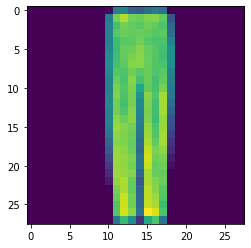

In [201]:
#  plotting the recreated image
plt.imshow(recreated_image.numpy().reshape(28,28))

# The recreated image does not have noise present. !!!

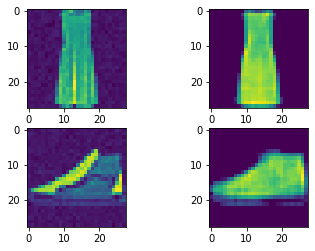

In [203]:
# creating a subplot for comparison
a,b=plt.subplots(2,2)
for i in range(2):
  number=np.random.randint(0,60000)
  data=x_noise_data[number]/255
  b[i][0].imshow(data)
  denoised_data=another_model(data.reshape(1,784)).numpy().reshape(28,28)
  b[i][1].imshow(denoised_data)